1. Introduction/ Business Problem

Chicago saw a major rise in violent crime starting in the late 1960s. Murders in the city peaked in 1974, with 970 murders when the city's population was over three million, resulting in a murder rate of around 29 per 100,000, and again in 1992, with 943 murders when the city had fewer than three million people, resulting in a murder rate of 34 murders per 100,000 citizen. Chicago reduced a murder rate in 2018. The municipal authorities want to keep this trend. They outsourced to prepare a report which is to identify crime patterns in Chicago.
The report should provide answers for below questions including difference between overall crimes and homicides:
- When crimes are committed? 

- Which community areas are the most dangerous? (crimes per 1000 inhabitants)

- Are police departments properly located? (Foursquare location)

2. Data section

The sources of data are official websites: https://data.cityofchicago.org and https://www.chicago.gov
In particular, the two specific datasets can be found at the following links:

- https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy
- https://raw.githubusercontent.com/piotr-ek7/Coursera_Capstone/master/Population.csv

Finally two tables were created:
total - containing all crimes
homicide - containing this kind of crime

Both tables consist of 15 columns which determine:
- Time of crime 
- Crime location (Block, Location Description,Longitude, Latitude, Community Area, Community Area Description)
- Crime classification (Case number, Primary Type, Arrest)
- Police assignment (Beat, District)

In [4]:
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', None) # Show all rows

# Download crime table - more information on website : https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

crime = pd.read_csv('https://data.cityofchicago.org/api/views/3i3m-jwuy/rows.csv?accessType=DOWNLOAD')
crime['Location Description'].fillna("OTHER",inplace=True) #populate missing Location Descriptions

crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11904631,JC526715,11/07/2018 09:30:00 AM,008XX W 47TH PL,0810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,933,9,20.0,61.0,06,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN
1,11904703,JC526754,07/02/2018 08:18:00 PM,038XX W 82ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,834,8,18.0,70.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN
2,11904557,JC526386,05/01/2018 09:00:00 AM,001XX E 13TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,132,1,3.0,33.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN
3,11904701,JC526706,07/16/2018 01:00:00 PM,024XX W DIVISION ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,COMMERCIAL / BUSINESS OFFICE,False,False,1423,14,26.0,24.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN
4,11899719,JC520725,09/01/2018 07:00:00 AM,123XX S NORMAL AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,523,5,34.0,53.0,08B,NaN,NaN,2018,11/27/2019 03:57:21 PM,NaN,NaN,NaN


In [5]:

crime.shape

(267646, 22)

In [6]:
#Download population table

population = pd.read_csv('https://raw.githubusercontent.com/piotr-ek7/Coursera_Capstone/master/Population.csv',error_bad_lines=False) #source: https://www.chicago.gov/city/en/depts/dcd/supp_info/community_area_2000and2010censuspopulationcomparisons.html
population.columns =['Community Area','Community Area Description','Community Area Population'] #rename columns
population.head()

,Community Area,Community Area Description,Community Area Population
0,1,Rogers Park,54991
1,2,West Ridge,71942
2,3,Uptown,56362
3,4,Lincoln Square,39493
4,5,North Center,31867


In [7]:
df = pd.merge(crime,population,on='Community Area',how="left") #join crime and population tables
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Area Description,Community Area Population
0,11904631,JC526715,11/07/2018 09:30:00 AM,008XX W 47TH PL,0810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,933,9,20.0,61.0,06,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,New City,44377.0
1,11904703,JC526754,07/02/2018 08:18:00 PM,038XX W 82ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,834,8,18.0,70.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,Ashburn,41081.0
2,11904557,JC526386,05/01/2018 09:00:00 AM,001XX E 13TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,132,1,3.0,33.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,Near South Side,21390.0
3,11904701,JC526706,07/16/2018 01:00:00 PM,024XX W DIVISION ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,COMMERCIAL / BUSINESS OFFICE,False,False,1423,14,26.0,24.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,West Town,81432.0
4,11899719,JC520725,09/01/2018 07:00:00 AM,123XX S NORMAL AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,523,5,34.0,53.0,08B,NaN,NaN,2018,11/27/2019 03:57:21 PM,NaN,NaN,NaN,West Pullman,29651.0


In [8]:
#Assignng a given season based on Date
month = df['Date'].str[:2].astype('int32') #extract month
season=[]

for m in month:
    if m in range(3,6): season.append('Spring')
    elif m in range(6,9): season.append('Summer')
    elif m in range(9,12): season.append('Fall')
    else: season.append('Winter')

season = pd.DataFrame(season,columns=["Season"])
df = pd.merge(df,season,left_index=True,right_index=True)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Area Description,Community Area Population,Season
0,11904631,JC526715,11/07/2018 09:30:00 AM,008XX W 47TH PL,0810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,933,9,20.0,61.0,06,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,New City,44377.0,Fall
1,11904703,JC526754,07/02/2018 08:18:00 PM,038XX W 82ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,834,8,18.0,70.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,Ashburn,41081.0,Summer
2,11904557,JC526386,05/01/2018 09:00:00 AM,001XX E 13TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,132,1,3.0,33.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,Near South Side,21390.0,Spring
3,11904701,JC526706,07/16/2018 01:00:00 PM,024XX W DIVISION ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,COMMERCIAL / BUSINESS OFFICE,False,False,1423,14,26.0,24.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,West Town,81432.0,Summer
4,11899719,JC520725,09/01/2018 07:00:00 AM,123XX S NORMAL AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,523,5,34.0,53.0,08B,NaN,NaN,2018,11/27/2019 03:57:21 PM,NaN,NaN,NaN,West Pullman,29651.0,Fall


In [9]:
#Assigning the part of day based on Date

hour = df['Date'].str[11:13] + df['Date'].str[-2:] #extract time
hours = [int(h[:2])+12 if h[-2:]=="PM" else int(h[:2]) for h in hour] #covert to 24h format

part_of_day=[]

for p in hours:
    if p in range(5,12): part_of_day.append('Morning')
    elif p in range(12,17): part_of_day.append('Afternoon')
    elif p in range(17,21): part_of_day.append('Evening')
    else: part_of_day.append('Night')
        
part_of_day = pd.DataFrame(part_of_day,columns=["Part of the day"])
df = pd.merge(df,part_of_day,left_index=True,right_index=True) 
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Area Description,Community Area Population,Season,Part of the day
0,11904631,JC526715,11/07/2018 09:30:00 AM,008XX W 47TH PL,0810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,933,9,20.0,61.0,06,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,New City,44377.0,Fall,Morning
1,11904703,JC526754,07/02/2018 08:18:00 PM,038XX W 82ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,834,8,18.0,70.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,Ashburn,41081.0,Summer,Evening
2,11904557,JC526386,05/01/2018 09:00:00 AM,001XX E 13TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,132,1,3.0,33.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,Near South Side,21390.0,Spring,Morning
3,11904701,JC526706,07/16/2018 01:00:00 PM,024XX W DIVISION ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,COMMERCIAL / BUSINESS OFFICE,False,False,1423,14,26.0,24.0,11,NaN,NaN,2018,11/28/2019 03:54:57 PM,NaN,NaN,NaN,West Town,81432.0,Summer,Afternoon
4,11899719,JC520725,09/01/2018 07:00:00 AM,123XX S NORMAL AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,523,5,34.0,53.0,08B,NaN,NaN,2018,11/27/2019 03:57:21 PM,NaN,NaN,NaN,West Pullman,29651.0,Fall,Morning


In [10]:
df = df[['Case Number','Season','Part of the day','Primary Type','Description','Block','Location Description','Arrest','Beat','District','Community Area','Community Area Description','Community Area Population','Latitude','Longitude']] #set a column order
df.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude
0,JC526715,Fall,Morning,THEFT,OVER $500,008XX W 47TH PL,COMMERCIAL / BUSINESS OFFICE,False,933,9,61.0,New City,44377.0,NaN,NaN
1,JC526754,Summer,Evening,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,038XX W 82ND PL,RESIDENCE,False,834,8,70.0,Ashburn,41081.0,NaN,NaN
2,JC526386,Spring,Morning,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,001XX E 13TH ST,RESIDENCE,False,132,1,33.0,Near South Side,21390.0,NaN,NaN
3,JC526706,Summer,Afternoon,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,024XX W DIVISION ST,COMMERCIAL / BUSINESS OFFICE,False,1423,14,24.0,West Town,81432.0,NaN,NaN
4,JC520725,Fall,Morning,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,123XX S NORMAL AVE,"SCHOOL, PUBLIC, BUILDING",False,523,5,53.0,West Pullman,29651.0,NaN,NaN


In [11]:
total = df.dropna(how="any", inplace=False) #clean missing data
total = total.reset_index(drop=True)
total['Community Area Population']= total['Community Area Population'].astype('int32')
total['Community Area']= total['Community Area'].astype('int32')
# Final Data Table
total.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude
0,JB524308,Summer,Afternoon,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,037XX S HERMITAGE AVE,RESIDENCE,False,912,31,59,McKinley Park,15612,41.968013,-87.818796
1,JB395922,Summer,Night,BURGLARY,FORCIBLE ENTRY,031XX N KOLMAR AVE,RESIDENCE,False,2521,25,20,Hermosa,25001,41.937823,-87.740668
2,JB528220,Fall,Evening,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,095XX S STONY ISLAND AVE,ALLEY,True,431,4,51,South Deering,15109,41.721844,-87.585072
3,JB495848,Summer,Night,DECEPTIVE PRACTICE,FORGERY,092XX S UNION AVE,RESIDENCE,True,2223,22,73,Washington Heights,26493,41.726124,-87.640913
4,JB505888,Fall,Morning,ARSON,BY FIRE,068XX S PERRY AVE,VEHICLE NON-COMMERCIAL,True,722,7,69,Greater Grand Crossing,32602,41.770428,-87.628300


In [12]:
# Final Data Table for Homicide
homicide = total[total['Primary Type']=='HOMICIDE']
homicide.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude
10,JB210902,Spring,Morning,HOMICIDE,FIRST DEGREE MURDER,059XX W WASHINGTON BLVD,APARTMENT,True,1512,15,25,Austin,98514,41.882117,-87.773895
13,JB262133,Spring,Evening,HOMICIDE,FIRST DEGREE MURDER,000XX W CHICAGO AVE,HALLWAY,True,1832,18,8,Near North Side,80484,41.896664,-87.629175
34,JB384129,Summer,Night,HOMICIDE,FIRST DEGREE MURDER,073XX S UNION AVE,AUTO,True,732,7,68,Englewood,30654,41.761034,-87.641869
37,JB181529,Spring,Night,HOMICIDE,RECKLESS HOMICIDE,007XX W 69TH ST,STREET,True,723,7,68,Englewood,30654,41.768866,-87.642745
77,JC476281,Fall,Evening,HOMICIDE,FIRST DEGREE MURDER,037XX N ASHLAND AVE,AUTO,False,1922,19,6,Lake View,94368,41.949456,-87.668921


In [14]:
homicide.shape

(590, 15)

3.Methodology

In [15]:
def Season(c):  #function to show percentage crimes in each season and party of the day
    df = c.copy()
    df_n= df[['Season','Part of the day',"Case Number"]].groupby(["Season"]+["Part of the day"]).count() #group by season ad party of the day
    df_n['Percentage']= round(df_n['Case Number']/(df['Case Number'].count())*100,2)
    df_n.columns=["Number of crimes",'Percentage']
    time_temp =  df_n.groupby(["Season"]).sum() #aggregate numer of crimes by season
    time_temp= time_temp.set_index(np.array(['Total'] * len(time_temp)), append=True) 
    df_n =pd.concat([df_n, time_temp]).sort_index(level=[0,1]) ##join together and sorts
    return df_n

time_total =Season(total)


def dataframe_style(c): # function to color Total 
    df = c.copy()
    df.loc[:,:] = '' #set default color
    idx = pd.IndexSlice # perform multi-index slicing
    df.loc[idx[:, 'Total'],:] = 'background-color: wheat'  #set particular cell colors
    return df 

time_total = time_total.style.apply(dataframe_style,axis=None)

time_total

In [16]:
time_homicide = Season(homicide)
time_homicide = time_homicide.style.apply(dataframe_style,axis=None)
time_homicide

In [17]:
time_partofday= homicide[['Part of the day',"Case Number"]].groupby(["Part of the day"]).count()
time_partofday['Percentage']= round(time_partofday['Case Number']/(homicide['Case Number'].count())*100,2)
time_partofday.columns=["Number of homicides",'Percentage']
time_partofday

,Number of homicides,Percentage
Part of the day,,
Afternoon,127,21.53
Evening,112,18.98
Morning,107,18.14
Night,244,41.36


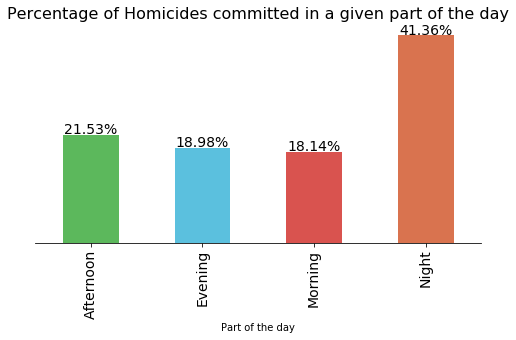

In [18]:
%matplotlib inline 

import matplotlib as mpl

color_list =['#5cb85c','#5bc0de','#d9534f','#d9734f']

ax=time_partofday['Percentage'].plot(kind="bar",figsize=(8, 4),width =0.5,color=color_list,fontsize=14)
ax.set_title("Percentage of Homicides committed in a given part of the day",fontsize=16 )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)

for i in ax.patches:
    ax.annotate('{:.2f}%'.format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points',fontsize=14)

In [19]:
def Crime_rate(c):  #function to show top 15 comunity area with the highest crime rate
    df = c.copy()
    df_n= df[['Community Area','Community Area Description',"Case Number",'Community Area Population']].groupby(['Community Area']+['Community Area Description']+['Community Area Population'], as_index=False).count() #group by community area
    df_n['Crime Rate']= round(df_n['Case Number']/(df_n['Community Area Population'])*1000,2)
    
    #there was an overrepresentation of sparsely populated community areas so the crime rate was normalized based on total crimes and crime rate.
    df_n['Crime Rate Normalized']= round(((df_n['Case Number']-df_n['Case Number'].min())/(df_n['Case Number'].max()-df_n['Case Number'].min())+(df_n['Crime Rate']-df_n['Crime Rate'].min())/(df_n['Crime Rate'].max()-df_n['Crime Rate'].min()))/2,2)
    df_n.columns=["Community Area",'Community Area Description','Community Area Population','Number of Crimes','Crime Rate','Crime Rate Normalized']
    return df_n.sort_values('Crime Rate Normalized',ascending=False)

crime_rate_total =Crime_rate(total) #call a function

crime_rate_total= crime_rate_total.reset_index(drop=True)
crime_rate_total.index = np.arange(1, len(crime_rate_total) + 1) #start indexing from 1
crime_rate_total['Community Area']= crime_rate_total['Community Area'].astype('int32')

crime_rate_total.head(15)

,Community Area,Community Area Description,Community Area Population,Number of Crimes,Crime Rate,Crime Rate Normalized
1,32,Loop,29283,10666,364.24,0.85
2,25,Austin,98514,14944,151.69,0.69
3,29,North Lawndale,35912,9234,257.13,0.65
4,8,Near North Side,80484,12822,159.31,0.63
5,26,West Garfield Park,18001,5625,312.48,0.61
6,28,Near West Side,54881,9255,168.64,0.52
7,43,South Shore,49767,8586,172.52,0.50
8,67,West Englewood,35505,7026,197.89,0.49
9,44,Chatham,31028,6463,208.30,0.48
10,27,East Garfield Park,20567,4879,237.22,0.47


In [20]:
crime_rate_homicide =Crime_rate(homicide) ##call a function
crime_rate_homicide= crime_rate_homicide.reset_index(drop=True)
crime_rate_homicide.index = np.arange(1, len(crime_rate_homicide) + 1) #start indexing from 1

crime_rate_homicide.rename(columns={'Number of Crimes':'Number of Homicides'},inplace=True)
crime_rate_homicide['Community Area']= crime_rate_homicide['Community Area'].astype('int32')

crime_rate_homicide.head(15)

,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized
1,25,Austin,98514,56,0.57,0.64
2,54,Riverdale,6482,13,2.01,0.61
3,26,West Garfield Park,18001,26,1.44,0.58
4,68,Englewood,30654,33,1.08,0.56
5,29,North Lawndale,35912,32,0.89,0.50
6,27,East Garfield Park,20567,22,1.07,0.45
7,53,West Pullman,29651,26,0.88,0.44
8,67,West Englewood,35505,23,0.65,0.36
9,43,South Shore,49767,25,0.50,0.34
10,61,New City,44377,23,0.52,0.33


In [21]:
crime_total_index = pd.DataFrame(crime_rate_total.index.values.astype(int).tolist()) #return an index in total crime
crime_total_index.index = np.arange(1, len(crime_total_index) + 1)


crime_total_index= pd.merge(crime_rate_total['Community Area'],crime_total_index,how="inner",left_index=True, right_index=True)  #
crime_total_index.columns=['Community Area',"Postion in Total Crimes"]

crime_total_index= crime_total_index.reset_index(drop=True)
crime_total_index.index = np.arange(1, len(crime_total_index) + 1) 

crime_rate_homicide = pd.merge(crime_rate_homicide,crime_total_index,on="Community Area",how='left',right_index=False,left_index=False) #Add postion in crime_rate_total

crime_rate_homicide= crime_rate_homicide.reset_index(drop=True)
crime_rate_homicide.index = np.arange(1, len(crime_rate_homicide) + 1)
crime_rate_homicide['Community Area']= crime_rate_homicide['Community Area'].astype('int32')

crime_rate_homicide.head(15)

,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized,Postion in Total Crimes
1,25,Austin,98514,56,0.57,0.64,2
2,54,Riverdale,6482,13,2.01,0.61,20
3,26,West Garfield Park,18001,26,1.44,0.58,5
4,68,Englewood,30654,33,1.08,0.56,12
5,29,North Lawndale,35912,32,0.89,0.50,3
6,27,East Garfield Park,20567,22,1.07,0.45,10
7,53,West Pullman,29651,26,0.88,0.44,22
8,67,West Englewood,35505,23,0.65,0.36,8
9,43,South Shore,49767,25,0.50,0.34,7
10,61,New City,44377,23,0.52,0.33,27


In [22]:
from sklearn.cluster import KMeans 

kclusters = 4

crime_rate_homicide_cluster = crime_rate_homicide.drop(['Community Area','Community Area Description','Community Area Population','Number of Homicides','Crime Rate','Postion in Total Crimes'], axis=1)

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crime_rate_homicide_cluster)

crime_rate_homicide.insert(7, 'Community Area Homicide Cluster', kmeans.labels_) #assign a cluster to crime rate homicide
crime_rate_homicide.head(15)

,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized,Postion in Total Crimes,Community Area Homicide Cluster
1,25,Austin,98514,56,0.57,0.64,2,1
2,54,Riverdale,6482,13,2.01,0.61,20,1
3,26,West Garfield Park,18001,26,1.44,0.58,5,1
4,68,Englewood,30654,33,1.08,0.56,12,1
5,29,North Lawndale,35912,32,0.89,0.50,3,1
6,27,East Garfield Park,20567,22,1.07,0.45,10,1
7,53,West Pullman,29651,26,0.88,0.44,22,1
8,67,West Englewood,35505,23,0.65,0.36,8,3
9,43,South Shore,49767,25,0.50,0.34,7,3
10,61,New City,44377,23,0.52,0.33,27,3


In [23]:

label_sorted = crime_rate_homicide.groupby('Community Area Homicide Cluster',as_index=False)['Crime Rate Normalized'].min() 
label_sorted =label_sorted.sort_values('Crime Rate Normalized') 
label_sorted = label_sorted.reset_index(drop=True)
label_sorted['label_new'] = label_sorted.index.values.astype(int)

my_dict = dict(zip(label_sorted['Community Area Homicide Cluster'], label_sorted['label_new']))

crime_rate_homicide['Community Area Homicide Cluster'].replace(my_dict, inplace=True) #assign a cluster in descending order
crime_rate_homicide.head(15)
    

,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized,Postion in Total Crimes,Community Area Homicide Cluster
1,25,Austin,98514,56,0.57,0.64,2,3
2,54,Riverdale,6482,13,2.01,0.61,20,3
3,26,West Garfield Park,18001,26,1.44,0.58,5,3
4,68,Englewood,30654,33,1.08,0.56,12,3
5,29,North Lawndale,35912,32,0.89,0.50,3,3
6,27,East Garfield Park,20567,22,1.07,0.45,10,3
7,53,West Pullman,29651,26,0.88,0.44,22,3
8,67,West Englewood,35505,23,0.65,0.36,8,2
9,43,South Shore,49767,25,0.50,0.34,7,2
10,61,New City,44377,23,0.52,0.33,27,2


In [24]:
crime_rate_homicide_labeled= crime_rate_homicide.drop(['Community Area Description','Community Area Population','Crime Rate Normalized','Postion in Total Crimes','Number of Homicides','Crime Rate'],axis=1)
homicide_clustered = pd.merge(homicide,crime_rate_homicide_labeled, on='Community Area',how='left')
homicide_clustered.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude,Community Area Homicide Cluster
0,JB210902,Spring,Morning,HOMICIDE,FIRST DEGREE MURDER,059XX W WASHINGTON BLVD,APARTMENT,True,1512,15,25,Austin,98514,41.882117,-87.773895,3
1,JB262133,Spring,Evening,HOMICIDE,FIRST DEGREE MURDER,000XX W CHICAGO AVE,HALLWAY,True,1832,18,8,Near North Side,80484,41.896664,-87.629175,0
2,JB384129,Summer,Night,HOMICIDE,FIRST DEGREE MURDER,073XX S UNION AVE,AUTO,True,732,7,68,Englewood,30654,41.761034,-87.641869,3
3,JB181529,Spring,Night,HOMICIDE,RECKLESS HOMICIDE,007XX W 69TH ST,STREET,True,723,7,68,Englewood,30654,41.768866,-87.642745,3
4,JC476281,Fall,Evening,HOMICIDE,FIRST DEGREE MURDER,037XX N ASHLAND AVE,AUTO,False,1922,19,6,Lake View,94368,41.949456,-87.668921,0


In [26]:
import requests # library to handle requests
import json  # library to handle JSON files
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [27]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'PBYAU2K4DLTW1UJGBT2BVLLB0O1ZCMLBEMA24P42OIVAP2U3' # your Foursquare ID
CLIENT_SECRET = 'N0A0URU3D1JBEFHLHVZDGFAXYMMR2MZT2JSG2TNQN4DSWAKO' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 20

In [28]:
# Search police departments nearby the crime site

def getNearbyPolice(cases, latitudes, longitudes, radius=5000,search_query = 'Police'):
    
    police_departments=[]
    for case, lat, lng in zip(cases, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION,
            search_query,
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        police_departments.append([(
            case, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    nearby_police = pd.DataFrame([item for police in police_departments for item in police])
    nearby_police.columns =['Case Number','Latitude','Longitude','Police Department','Latitude Police','Longitude Police']
    
    return(nearby_police)

In [29]:
chicago_police = getNearbyPolice( cases=homicide_clustered['Case Number'],
                                   latitudes=homicide_clustered['Latitude'],
                                   longitudes=homicide_clustered['Longitude']
                                  )

In [30]:
chicago_police.head()

,Case Number,Latitude,Longitude,Police Department,Latitude Police,Longitude Police
0,JB210902,41.882117,-87.773895,15 District Police Station,41.880093,-87.768869
1,JB210902,41.882117,-87.773895,Chicago Police Department - 25th District - Gr...,41.918133,-87.765496
2,JB210902,41.882117,-87.773895,Military Police Supply,41.879810,-87.809470
3,JB210902,41.882117,-87.773895,Oak Park Police Department,41.879160,-87.778887
4,JB210902,41.882117,-87.773895,Berwyn Police Dept,41.836224,-87.785450


In [31]:
from geopy.distance import geodesic  #Define the distance between police station and crime site
Distance=[]
for lat1,lng1,lat2,lng2 in zip(chicago_police['Latitude'],chicago_police['Longitude'],chicago_police['Latitude Police'],chicago_police['Longitude Police']):
                                                                                                                                        coords_1 = (lat1, lng1)
                                                                                                                                        coords_2 = (lat2, lng2)
                                                                                                                                        Distance.append(round(geodesic(coords_1, coords_2).m,0))
chicago_police['Distance [m]'] = Distance

In [32]:
chicago_police.head()

,Case Number,Latitude,Longitude,Police Department,Latitude Police,Longitude Police,Distance [m]
0,JB210902,41.882117,-87.773895,15 District Police Station,41.880093,-87.768869,474.0
1,JB210902,41.882117,-87.773895,Chicago Police Department - 25th District - Gr...,41.918133,-87.765496,4061.0
2,JB210902,41.882117,-87.773895,Military Police Supply,41.879810,-87.809470,2964.0
3,JB210902,41.882117,-87.773895,Oak Park Police Department,41.879160,-87.778887,529.0
4,JB210902,41.882117,-87.773895,Berwyn Police Dept,41.836224,-87.785450,5187.0


In [33]:
chicago_police.shape

(9697, 7)

In [34]:
chicago_police_grouped = chicago_police.groupby(['Case Number'],as_index=False)['Distance [m]'].min() #find the nearest police department
chicago_police_grouped.head()

,Case Number,Distance [m]
0,D439410,3204.0
1,F780368,784.0
2,HS260050,2034.0
3,HW249839,759.0
4,HY370531,535.0


In [35]:
mclusters = 4

#run k-means clustering

chicago_police_cluster= chicago_police_grouped.drop('Case Number',axis=1)
kmeans = KMeans(n_clusters=mclusters, random_state=0).fit(chicago_police_cluster)

chicago_police_grouped.insert(2, 'Police Department Cluster', kmeans.labels_) #assign a cluster to case number based on desitance to Police Department
chicago_police_grouped.head()

,Case Number,Distance [m],Police Department Cluster
0,D439410,3204.0,1
1,F780368,784.0,0
2,HS260050,2034.0,2
3,HW249839,759.0,0
4,HY370531,535.0,0


In [36]:
chicago_police_grouped.shape

(567, 3)

In [39]:
chicago_police_grouped.head()

,Case Number,Distance [m],Police Department Cluster
0,D439410,3204.0,1
1,F780368,784.0,0
2,HS260050,2034.0,2
3,HW249839,759.0,0
4,HY370531,535.0,0


In [40]:
homicide_clustered_final = pd.merge(homicide_clustered,chicago_police_grouped,on="Case Number",how='left')
homicide_clustered_final.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude,Community Area Homicide Cluster,Distance [m],Police Department Cluster
0,JB210902,Spring,Morning,HOMICIDE,FIRST DEGREE MURDER,059XX W WASHINGTON BLVD,APARTMENT,True,1512,15,25,Austin,98514,41.882117,-87.773895,3,474.0,0
1,JB262133,Spring,Evening,HOMICIDE,FIRST DEGREE MURDER,000XX W CHICAGO AVE,HALLWAY,True,1832,18,8,Near North Side,80484,41.896664,-87.629175,0,34.0,0
2,JB384129,Summer,Night,HOMICIDE,FIRST DEGREE MURDER,073XX S UNION AVE,AUTO,True,732,7,68,Englewood,30654,41.761034,-87.641869,3,1043.0,3
3,JB181529,Spring,Night,HOMICIDE,RECKLESS HOMICIDE,007XX W 69TH ST,STREET,True,723,7,68,Englewood,30654,41.768866,-87.642745,3,1431.0,3
4,JC476281,Fall,Evening,HOMICIDE,FIRST DEGREE MURDER,037XX N ASHLAND AVE,AUTO,False,1922,19,6,Lake View,94368,41.949456,-87.668921,0,1470.0,3


In [41]:
homicide_clustered_final.shape

(590, 18)

In [57]:

#The json file is based on zip-code so community areas need to be mapped to zip-codes
zip_code = pd.read_csv('Zip code.csv')  #https://github.com/piotr-ek7/Coursera_Capstone/blob/master/Zip%20code.csv
zip_code  = pd.merge(zip_code,crime_rate_homicide,on='Community Area',how='inner')
zip_code = zip_code .drop(['Community Area Population','Number of Homicides','Crime Rate','Crime Rate Normalized','Postion in Total Crimes'],axis=1)
zip_code = zip_code.sort_values('Community Area Homicide Cluster',ascending=False)
zip_code['Zip code'] = zip_code['Zip code'].astype(str)
zip_code.head()

FileNotFoundError: [Errno 2] File b'Zip code.csv' does not exist: b'Zip code.csv'